# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>


<p>You can include written notes in notebook cells using Markdown:</p> 
    <ul>
    <li>In the control panel at the top, choose Cell > Cell Type > Markdown</li>
    <li>Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet</li>
    </ul>
    
<p>Resources</p>
<ul>
<li><a href="http://www.amstat.org/publications/jse/datasets/normtemp.txt">Norm temp</a></li> 
<li><a href="http://www.amstat.org/publications/jse/jse_data_archive.htm">JSE Data Archive</a></li>
<li><a href="http://nestacms.com/docs/creating-content/markdown-cheat-sheet">Markdown syntax</a></li>
</ul>
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [84]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats 
from statsmodels.stats.weightstats import ztest

plt.style.use('ggplot')

# Is the distribution of body temperatures normal?

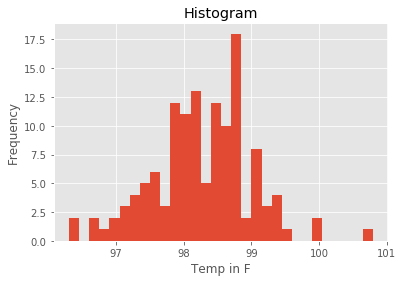

In [10]:
df['temperature'].plot(kind='hist', bins=30)
plt.xlabel("Temp in F")
plt.ylabel("Frequency")
plt.title("Histogram")

In [32]:
# How to test normality https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html
normal = stats.mstats.normaltest(df['temperature'])
if normal.pvalue >= .05: 
    print("Reject the null - Not normal distribution: (p = {0})".format(normal.pvalue))
else: 
    print("Retain the null - Normal distribution: p = {0}".format(normal.pvalue))

Reject the null - Not normal distribution: (p = 0.2587479863488254)


# Is the sample size large?

In [39]:
print("Sample size: {0}".format(df.shape[0]))
print("Depending on where you look a sample size of 30 is recommended for CLT so 130 is big enough although" +
      "I'm not sure I'd say that's really large."
     )

Sample size: 130
Depending on where you look a sample size of 30 is recommended for CLT so 130 is big enough althoughI'm not sure I'd say that's really large.


#  Are the observations independent?
    The index is set on import import with no definite ID in the file so my best guess is that the observations are independent.

# Is the true population mean really 98.6 degrees F?

    Would you use a one-sample or two-sample test? Why?
    -- Since we are looking at the true population mean you would use a one-sample test. 

    In this situation, is it appropriate to use the  t  or  z  statistic?
    
    --Sample size > 30 so a Z-Score is more appropriate
    Source: http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/

In [69]:
# Z-statistic 
zscore = ztest(df['temperature'], value = 98.6)

# T-statistic
tscore = stats.ttest_1samp(df['temperature'], 98.6)

In [71]:
print('Z-score:{0}; T-score:{1}'.format(zscore[0], tscore.statistic))

Z-score:-5.4548232923645195; T-score:-5.4548232923645195


    The test values aren't different.  You can convert T-scores into z-scores with the equation T = (Z x 10) + 50.
    As far as I know, the t / z distributions just have different means/std.  Since you can 
    convert between the two I'm not sure that you could end up with one being significant and the other not.  It's 
    just a matter of metric.

# At what temperature should we consider someone's temperature to be "abnormal"?

In [86]:
# http://adventuresinpython.blogspot.com/2012/12/confidence-intervals-in-python.html

abnormal = stats.norm.interval(0.95, loc=df['temperature'].mean(), scale=df['temperature'].std()/math.sqrt(len(df['temperature'])))
print("Using a 95% CI: Temps below {0} or above {1} are abnormal".format(abnormal[0], abnormal[1]))

Using a 95% CI: Temps below 98.12319642818166 or above 98.3752651102799 are abnormal


# Is there a significant difference between males and females in normal temperature?

In [115]:
males = df[df['gender'] == 'M']['temperature']
females = df[df['gender'] == 'F']['temperature']

In [119]:
diff = stats.ttest_ind(males, females)
diff

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [121]:
print(males.mean())
print(females.mean())

98.1046153846154
98.39384615384613


There is a statistically significant difference (p=.02) such that women (M=98.29) have a slightly higher average temperature than men (M=98.11).